<a href="https://colab.research.google.com/github/fikarmohiswa/Pemrograman_Python/blob/main/Proj_Tubes_Part4_Week14_FikarMohammad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama** : Fikar Mohammad Istiqlalul Wathan

**NIM** : 1101194285

**Kelas** : TT-43-G10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Mendefinisikan Besaran Pathloss**

In [6]:
def cost(fr,type_d,hi_t,hi_r,d):
  # fr = frekuensi
  # type_d = tipe jarak
  # hi_t = gain transmitter
  # hi_r = gain penerima
  # d = jarak
    if fr in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif fr in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if type_d=='urban' :
        Cm=0
    elif type_d=='suburban' :
        Cm= -2*((np.log10((fr/28)**2))-5.4)
    elif type_d=='open' :
        Cm= -4.78*(np.log10(fr))+18.33*(np.log10(fr))-40.94
    else :
        Cm='salah memasukkan tipe'
    
    Ah_r = (1.1*np.log10(fr)-0.7)*hi_r-(1.56*np.log10(fr)-1.8)
    Lossp = Ca+(Cb*np.log10(fr))-(13.83*np.log(hi_t))-Ah_r+((44.9-6.55*np.log10(hi_t))*np.log10(d))-Cm
    
    return Lossp

In [9]:
frec=1800 #MHz
twr=80 #m
user=1.5 #m
N=200 #titik
d_min=300 #m
d_max=1000 #m

d=np.random.randint(d_min,d_max,N)

LossPU=cost(frec, 'urban', twr, user, d)
LossPS=cost(frec, 'suburban', twr, user, d)
LossPO=cost(frec, 'open', twr, user, d)

In [24]:
#sorting
d_sort=d[np.argsort(d)]
Urban_sort=LossPU[np.argsort(d)]
Suburban_sort=LossPS[np.argsort(d)]
Open_sort=LossPO[np.argsort(d)]

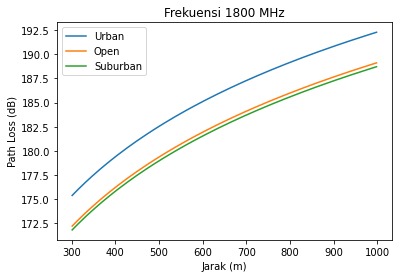

In [26]:
plt.figure()
plt.plot(d_sort,Urban_sort, label='Urban')
plt.plot(d_sort,Open_sort, label='Open')
plt.plot(d_sort,Suburban_sort, label='Suburban')
plt.title('Frekuensi 1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [27]:
f1= 700 #mhz
f2= 900 #mhz
f3= 1800 #mhz
loc= 'urban'
LossPUrb_1=cost(f1, loc, twr, user, d)
LossPUrb_2=cost(f2, loc, twr, user, d)
LossPUrb_3=cost(f3, loc, twr, user, d)

In [28]:
d_sort=d[np.argsort(d)]
Urban1_sort=LossPUrb_1[np.argsort(d)]
Urban2_sort=LossPUrb_2[np.argsort(d)]
Urban3_sort=LossPUrb_3[np.argsort(d)]

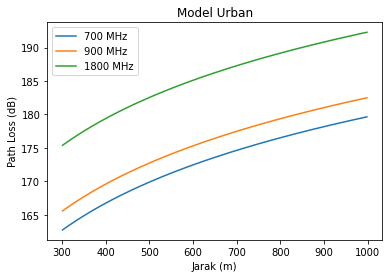

In [29]:
plt.figure()
plt.plot(d_sort,Urban1_sort, label='700 MHz')
plt.plot(d_sort,Urban2_sort, label='900 MHz')
plt.plot(d_sort,Urban3_sort, label='1800 MHz')
plt.title('Model Urban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

**Daya Terima**

In [30]:
G_Tx=10 #dB
G_Rx=2 #dB
B_W=5000000 #Hz
P_t=30000 #miliWatt

In [36]:
def P_r(P_t,LossP,G_Tx,G_Rx):
  NtL=lambda x:10*np.log10(x)
  P_Tx=NtL(P_t)
  P_Rxx=P_Tx-LossP+G_Tx+G_Rx
  LtN=lambda x:10**(x/10)
  P_Rx=LtN(P_Rxx)
  return P_Rx

In [38]:
Prx_Urban=P_r(P_t, Urban_sort, G_Tx, G_Rx)
Prx_Suburban=P_r(P_t, Suburban_sort, G_Tx, G_Rx)
Prx_Open=P_r(P_t, Open_sort, G_Tx, G_Rx)

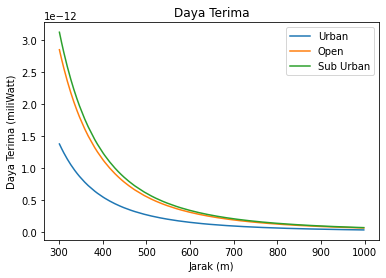

In [39]:
plt.figure()
plt.plot(d_sort,Prx_Urban, label='Urban')
plt.plot(d_sort,Prx_Open, label='Open')
plt.plot(d_sort,Prx_Suburban, label='Sub Urban')
plt.title('Daya Terima')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

In [40]:
Prx_U1=P_r(P_t,Urban1_sort,G_Tx,G_Rx)
Prx_U2=P_r(P_t,Urban2_sort,G_Tx,G_Rx)
Prx_U3=P_r(P_t,Urban3_sort,G_Tx,G_Rx)

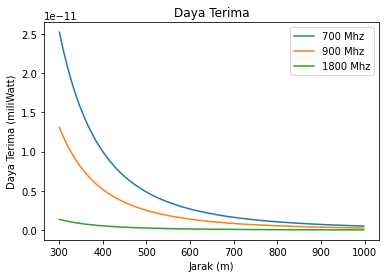

In [41]:
plt.figure()
plt.plot(d_sort,Prx_U1, label='700 Mhz')
plt.plot(d_sort,Prx_U2, label='900 Mhz')
plt.plot(d_sort,Prx_U3, label='1800 Mhz')
plt.title('Daya Terima')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

**Signal to Noise Ratio (SNR)**

In [43]:
def SNR(P_Rx,B_W):
  N1=(-174)+10*np.log10(B_W)
  LtN=lambda x:10**(x/10)
  Noise=LtN(N1)
  SNR=P_Rx/Noise
  return SNR

In [44]:
SNR_Urban=SNR(Prx_Urban,B_W)
SNR_Suburban=SNR(Prx_Suburban,B_W)
SNR_Open=SNR(Prx_Open,B_W)


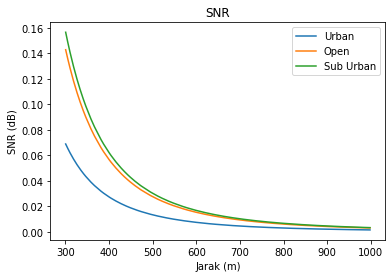

In [45]:
plt.figure()
plt.plot(d_sort,SNR_Urban, label='Urban')
plt.plot(d_sort,SNR_Open, label='Open')
plt.plot(d_sort,SNR_Suburban, label='Sub Urban')
plt.title('SNR')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [47]:
SNR_U1=SNR(Prx_U1,B_W)
SNR_U2=SNR(Prx_U2,B_W)
SNR_U3=SNR(Prx_U3,B_W)

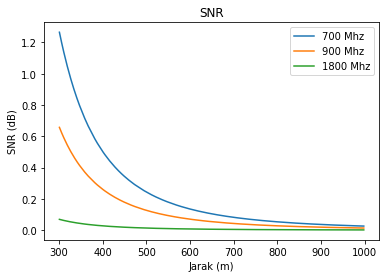

In [48]:
plt.figure()
plt.plot(d_sort,SNR_U1, label='700 Mhz')
plt.plot(d_sort,SNR_U2, label='900 Mhz')
plt.plot(d_sort,SNR_U3, label='1800 Mhz')
plt.title('SNR')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

**Kapasitas**

In [49]:
def Cap(SNR,B_W):
  Cell_Cap=B_W*(np.log2(1+SNR))
  return Cell_Cap

In [50]:
Cell_Cap_Urban=Cap(SNR_Urban,B_W)
Cell_Cap_Suburban=Cap(SNR_Suburban,B_W)
Cell_Cap_Open=Cap(SNR_Open,B_W)

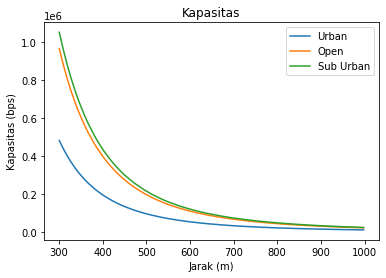

In [52]:
plt.figure()
plt.plot(d_sort,Cell_Cap_Urban, label='Urban')
plt.plot(d_sort,Cell_Cap_Open, label='Open')
plt.plot(d_sort,Cell_Cap_Suburban, label='Sub Urban')
plt.title('Kapasitas')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [53]:
Cell_Cap_U1=Cap(SNR_U1,B_W)
Cell_Cap_U2=Cap(SNR_U2,B_W)
Cell_Cap_U3=Cap(SNR_U3,B_W)

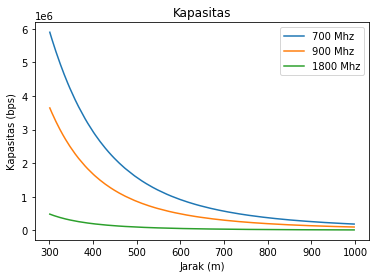

In [55]:
plt.figure()
plt.plot(d_sort,Cell_Cap_U1, label='700 Mhz')
plt.plot(d_sort,Cell_Cap_U2, label='900 Mhz')
plt.plot(d_sort,Cell_Cap_U3, label='1800 Mhz')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()